In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [3]:

X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [4]:

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [5]:

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, validation_split=0.2)

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 36s 27ms/step - accuracy: 0.3855 - loss: 1.7038 - val_accuracy: 0.5551 - val_loss: 1.2599
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 34s 27ms/step - accuracy: 0.5734 - loss: 1.2092 - val_accuracy: 0.5992 - val_loss: 1.1579
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 31s 25ms/step - accuracy: 0.6305 - loss: 1.0568 - val_accuracy: 0.6004 - val_loss: 1.1781
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 33s 26ms/step - accuracy: 0.6649 - loss: 0.9554 - val_accuracy: 0.6302 - val_loss: 1.0639
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 33s 27ms/step - accuracy: 0.6953 - loss: 0.8701 - val_accuracy: 0.6376 - val_loss: 1.0598
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 33s 26ms/step - accuracy: 0.7266 - loss: 0.7866 - val_accuracy: 0.6412 - val_loss: 1.0667
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 35s 28ms/step - accuracy: 0.7487 - loss: 0.7186 - val_accuracy: 0.6433 - val_loss: 1.0871
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 42s 29ms/step - accuracy: 0.7694 -

In [7]:
first_layer_weights = model.layers[0].get_weights()[0]

In [8]:

f_min, f_max = first_layer_weights.min(), first_layer_weights.max()
filters = (first_layer_weights - f_min) / (f_max - f_min)

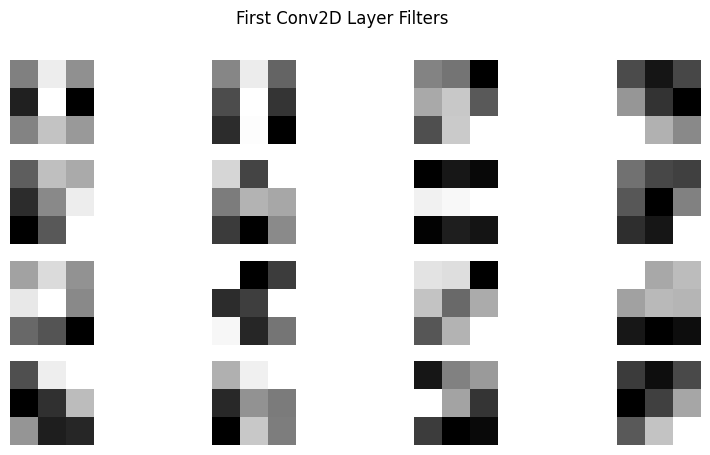

In [9]:

plt.figure(figsize=(10,5))
for i in range(16):
    plt.subplot(4,4,i+1)
   
    f = filters[:,:,:,i].mean(axis=2)
    plt.imshow(f, cmap='gray')
    plt.axis('off')
plt.suptitle('First Conv2D Layer Filters')
plt.show()

In [10]:

feature_map_model = tf.keras.Model(inputs=model.inputs, outputs=model.layers[0].output)

In [11]:

sample_image = X_test[0:1]
feature_maps = feature_map_model.predict(sample_image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\keras\src\models\functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(1, 32, 32, 3))
  warnings.warn(msg)


<Axes: >

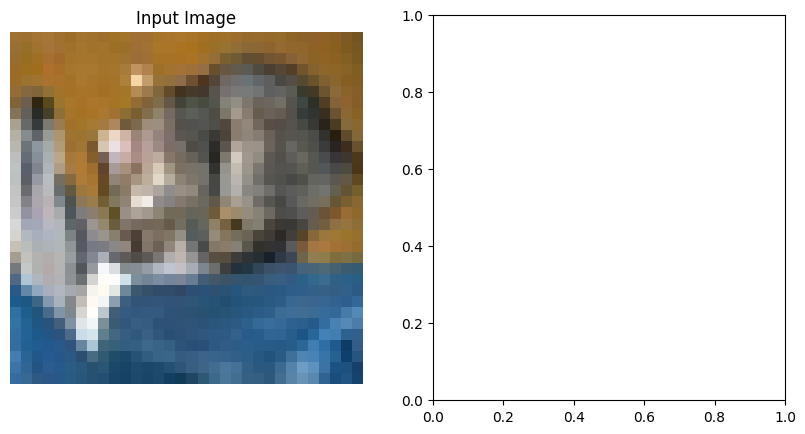

In [12]:

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(sample_image[0])
plt.title('Input Image')
plt.axis('off')

plt.subplot(1,2,2)

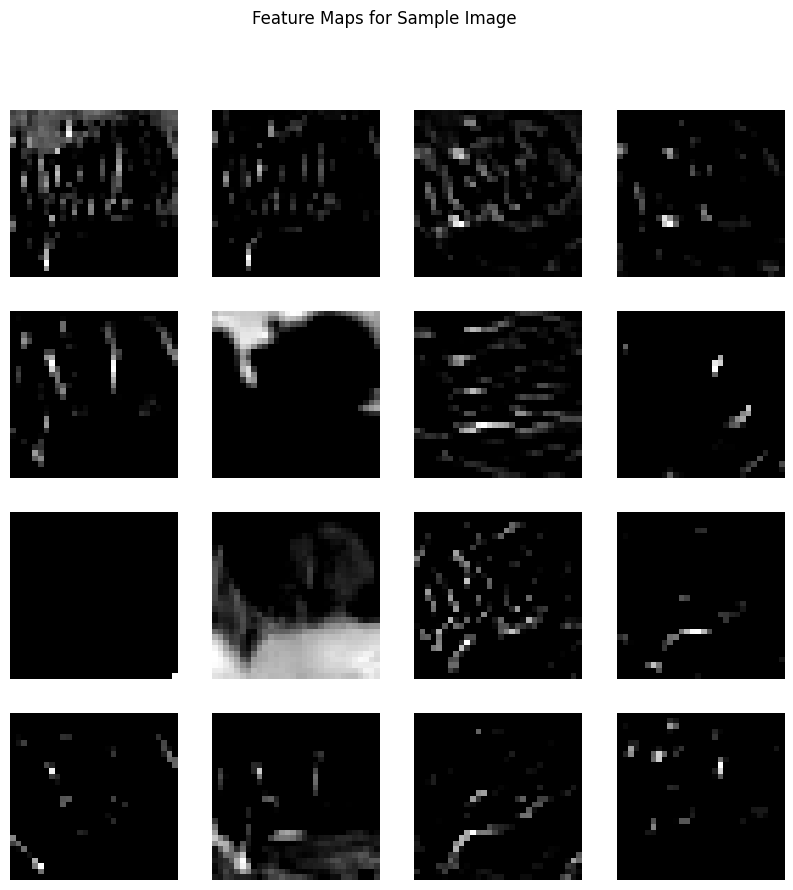

In [13]:

plt.figure(figsize=(10,10))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(feature_maps[0,:,:,i], cmap='gray')
    plt.axis('off')
plt.suptitle('Feature Maps for Sample Image')
plt.show()

In [14]:

print("\nInterpretation:")
print("The filters in the first convolutional layer typically learn to detect simple patterns")
print("like edges, color contrasts, and basic textures. The feature maps show how these")
print("filters respond to different parts of the input image - activating strongly when")
print("their learned pattern is present in that region of the image.")


Interpretation:
The filters in the first convolutional layer typically learn to detect simple patterns
like edges, color contrasts, and basic textures. The feature maps show how these
filters respond to different parts of the input image - activating strongly when
their learned pattern is present in that region of the image.
